In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt

# @param dfFile: pandas.DataFrame ('nba_preprocessed.csv')
# @param dateStart, dateEnd: str in the format of 'YYYY-MM-DD'
# @param attriToDrop: list[str]
# @return X, Y: pandas.DataFrame
# featureExtraction() outputs X, Y for model training.
# Game date can be assigned
# Attribute to be dropped can be assigned
def featureExtraction(dfFile, dateStart='1000-01-01', dateEnd='2999-12-31', attriToDrop=None):
    df = pd.read_csv(dfFile)
    
    # Date selection
    df = df.loc[(df.Date_A > dateStart) & (df.Date_A < dateEnd), :].reset_index(drop=True)
    
    # Get label Y
    Y = df[['W/L_A']]
    Y = Y.rename(columns={'W/L_A': 'Label'})
    
    # Get attributes X
    colToDrop = ['Team_A', 'Date_A', 'W/L_A', 'Score_A', 'Opponent_A', 'Team_B', 'Date_B', 'W/L_B', 'Home/Away_B', 'Score_B', 'Opponent_B']
    colToDrop += attriToDrop if attriToDrop else []
    X = df.drop(columns = colToDrop)
    
    return X, Y

In [2]:
dfFile = '../../python_ex/NBA_Ino_Part/nba_preprocessed.csv'
dateStart = '2013-10-01'
dateEnd = '2018-04-30'
# X, Y = featureExtraction(dfFile, dateStart, dateEnd)
X, Y = featureExtraction(dfFile, attriToDrop=['PTS_A', 'PTS_B'], dateStart=dateStart, dateEnd=dateEnd)
# X, Y = featureExtraction(dfFile)

In [3]:
a = [1 for x in Y.loc[:, 'Label'] if(x == 0)]
len(a)

5851

In [4]:
a = [1 for x in Y.loc[:, 'Label'] if(x == 1)]
len(a)

5851

# PCA

In [5]:
from sklearn.preprocessing import StandardScaler
features = list(X.columns)
X_val = X.values

# Feature standardization
X_val = StandardScaler().fit_transform(X_val)
X_val

array([[-1.        , -0.62410992, -0.68542685, ...,  0.91242434,
         1.13571274,  0.1729873 ],
       [ 1.        , -0.87977136, -1.48209599, ...,  1.31469959,
         0.35094094,  0.86254018],
       [-1.        , -1.82937099, -2.47793243, ...,  0.91242434,
         0.08935034,  0.86254018],
       ...,
       [-1.        ,  0.47158197,  0.31040959, ..., -0.69667665,
        -0.43383086,  1.09239114],
       [-1.        , -0.1493101 ,  0.1112423 , ..., -0.69667665,
        -0.69542147,  0.86254018],
       [ 1.        ,  1.00116638,  1.50541331, ...,  0.10787384,
         0.08935034,  0.40283826]])

In [6]:
from sklearn.decomposition import PCA
num_comp = len(features)
pca = PCA(n_components=num_comp)
X_val_pca = pca.fit_transform(X_val)
# X_PCA = pd.DataFrame(data = X_val_pca, columns = ['PC1', 'PC2'])
new_columns = ["PCA_"+str(x) for x in range(1, num_comp+1, 1)]
X_PCA = pd.DataFrame(data = X_val_pca, columns = new_columns)
X_PCA
print(pca.explained_variance_ratio_)
print(f'Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}')

[1.14037840e-01 1.03108550e-01 1.00163452e-01 8.84328887e-02
 7.64351484e-02 5.86007979e-02 5.71853837e-02 5.08938409e-02
 4.60632332e-02 4.07066252e-02 3.21039465e-02 3.05158496e-02
 2.81871936e-02 2.80003374e-02 2.48356410e-02 2.43904911e-02
 1.77082419e-02 1.53896195e-02 1.37574933e-02 1.19181518e-02
 1.03080995e-02 8.38691103e-03 5.32694888e-03 4.80895980e-03
 2.88356188e-03 2.81107725e-03 1.31103489e-03 5.55034668e-04
 5.40588899e-04 2.44772596e-04 2.36621821e-04 7.81130342e-05
 7.35501016e-05 2.24838819e-32 1.88526648e-33]
Explained Variance Ratio: 1.0


In [7]:
from sklearn.decomposition import PCA
num_comp = 2
pca = PCA(n_components=num_comp)
X_val_pca = pca.fit_transform(X_val)
# X_PCA = pd.DataFrame(data = X_val_pca, columns = ['PC1', 'PC2'])
new_columns = ["PCA_"+str(x) for x in range(1, num_comp+1, 1)]
X_PCA = pd.DataFrame(data = X_val_pca, columns = new_columns)
X_PCA
print(pca.explained_variance_ratio_)
print(f'Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}')

[0.11403783 0.10310855]
Explained Variance Ratio: 0.21714637996789732


Number of label 0 = 5851
Number of label 1 = 5851


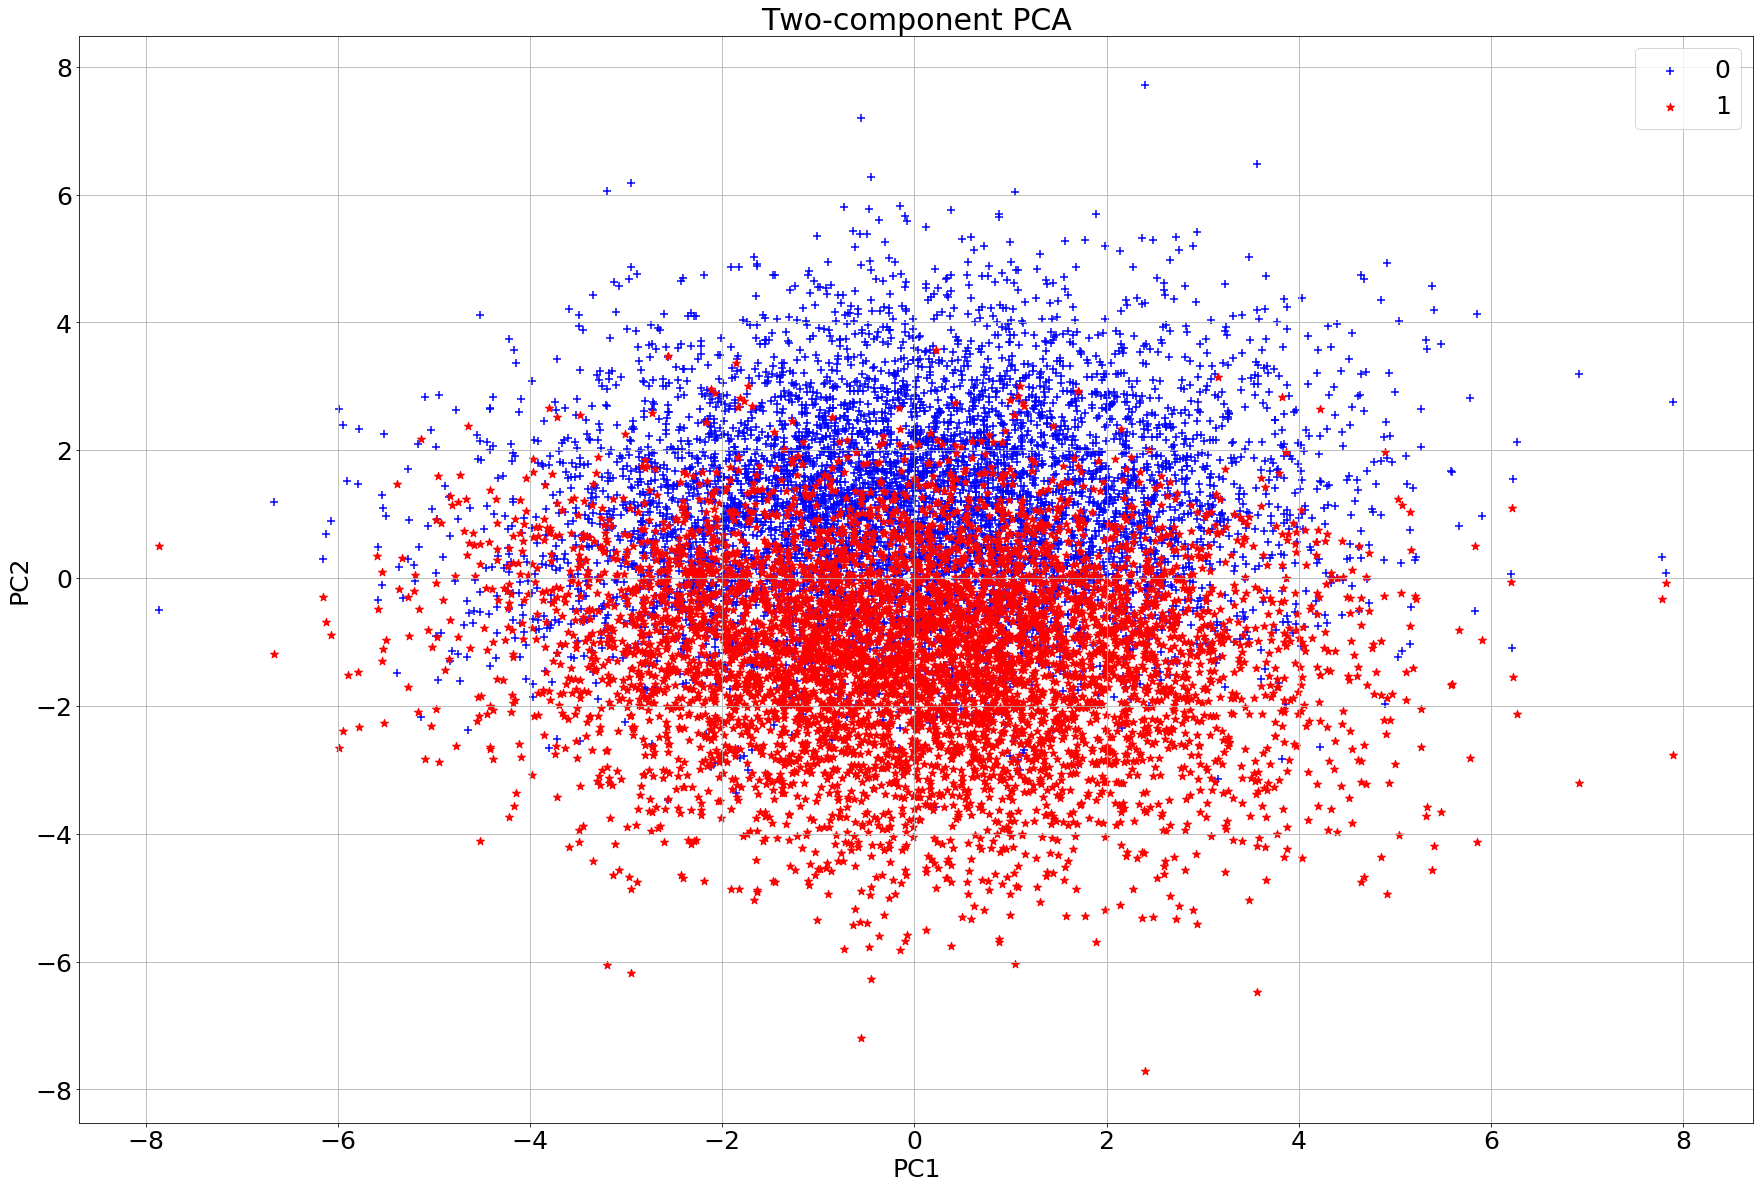

In [8]:
plt.figure(figsize=(30, 20))
matplotlib.rcParams.update({'font.size': 25})
labels = [0, 1]
colors = ['b', 'r']
markers = ['+', '*']
for label, c, m in zip(labels, colors, markers):
    indicesToKeep = Y['Label'] == label
    print('Number of label', label, '=', list(indicesToKeep).count(label))
    plt.scatter(X_PCA.loc[indicesToKeep, 'PCA_1'], X_PCA.loc[indicesToKeep, 'PCA_2'], color=c, marker=m, s=70)
plt.grid(True)
plt.legend(labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Two-component PCA')
plt.show()